In [5]:
"""
Dear Springboard Grader, 
    I took the video on self-reliance to heart and did 
nothing more than download tier 3, write the question down, 
and deleted most of the comments and instructions and went about
it as though I were asked by my boss to get this information. 
It took a long time. maybe 13 hours. I know taht sounds crazy 
but I figured every litlle thing out and spent too much time 
on experimenting with python code. It was certainly a 
learnign experience. I choose not to answer the last modeling
function because I just have to get going to the next module. 
I used the functions in my current code as proof that function 
would have been executed properly. I left brief comments along
the way in order to show how may have been thinking in a real 
world task. ie: obviosuly the boroughs were accurate,
but that may not have been obvious in the office environment. 
I was also begining to go down the rabbit hole with the graph 
when I couldn't figure out in a speedy way to adjust the
borough names. Sorry. 
I look forward to your feedback. 
Cheers. 
Scott
    
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from datetime import timezone

"""

Which London borough has seen the greatest avgerage 
increase in housing prices over the dataset?

The ‘annual’ percentage change in house prices is simply the
price change relative to the same month twelve months earlier.

This annual rate of price change reflects the best estimate for 
how much the value of a typical property has changed over the 
precedingtwelve months. Similar to the ‘annual’ change, 
the ‘monthly’ percentage change estimates the percentage 
change in average house prices relative to the previous month.
  
"""

def change_date(timestamp_list):
	dict_key = []
	dict_value = []
	for name in timestamp_list:
		t = name
		u = t.date()
		v = f'{u.day}-{u.month}-{u.year}'
		dict_key.append(t)
		dict_value.append(v)
	col_dict = dict(zip(dict_key,dict_value))
	return col_dict


def avg_increase(last: float,first: float) -> float:
	return round(((last - first) / first) * 100)


url_LondonHousePrices = "https://data.london.gov.uk/download/uk-" \
                        "house-price-index/70ac0766-8902-4eb5-aab5-" \
                        "01951aaed773/UK%20House%20price%20index.xls"

properties = pd.read_excel(url_LondonHousePrices,
                           sheet_name="Average price",index_col=None)

# list of actual boroughs: real world details
actual_boroughs = sorted(['Westminster',
                          'Kensington & Chelsea',
                          'Hammersmith & Fulham',
                          'Wandsworth',
                          'Lambeth',
                          'Southwark',
                          'Tower Hamlets',
                          'Hackney',
                          'Islington',
                          'Camden',
                          'Brent',
                          'Ealing',
                          'Hounslow',
                          'Richmond upon Thames',
                          'Kingston upon Thames',
                          'Merton',
                          'Sutton',
                          'Croydon',
                          'Bromley',
                          'Lewisham',
                          'Greenwich',
                          'Bexley',
                          'Havering',
                          'Barking and Dagenham',
                          'Redbridge',
                          'Newham',
                          'Waltham Forest',
                          'Haringey',
                          'Enfield',
                          'Barnet',
                          'Harrow',
                          'Hillingdon'])

# data set boroughs for later comparison
data_set_boroughs = list(properties.columns)

# see what's going on
hd = properties.head()
shp = properties.shape  # 329, 49
d_type = properties.dtypes

# deal with unneeded columns
for (name,series) in properties.iteritems():
	if series.isna().all():
		properties.drop(name,axis=1,inplace=True)

properties.rename(columns={'Unnamed: 0': 'Date'},inplace=True)
test_date = properties.loc[:1,'Date']

# deal with unneeded rows
dups = properties.duplicated()
if dups.any():
	for j,k in enumerate(dups):
		if k:
			print(f'delete {j}\nIs duplicate')
			properties.drop_duplicates(j,axis=1,inplace=True)
else:
	print('No duplicates')

properties.drop(index=0,axis=0,inplace=True)
properties.drop(columns='City of London',axis=1,inplace=True)

# verify real world vs data set
actual_boroughs.append("Date")
length_west = properties.loc[:,:'Westminster']
list_west = [i.strip() for i in sorted(list(properties.loc[:,:'Westminster']))]
actual_boroughs_1 = [i.strip() for i in sorted(actual_boroughs)]

for i in list_west:
	for j in actual_boroughs_1:
		if i == j:
			continue
print('Dataset rows and columns set')

No duplicates
Dataset rows and columns set


In [6]:
# make things easier on the eyes
length_west_tr = length_west.transpose()
length_west_tr.reset_index(inplace=True)
header_row = length_west_tr.iloc[0]
t_spose = pd.DataFrame(length_west_tr.values[1:],columns=header_row)
t_spose.rename(columns={"Date": "Borough"},inplace=True)
t_spose.set_index('Borough',inplace=True)
date_list = list(t_spose.columns)
t_spose.rename(columns=change_date(date_list),inplace=True)

# calculate average increase and present findings
average_increase = []
for index,rows in t_spose.iterrows():
	average_increase.append(avg_increase(rows[-1],rows[0]))
t_spose['Average Increase'] = average_increase

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_21014/242393337.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


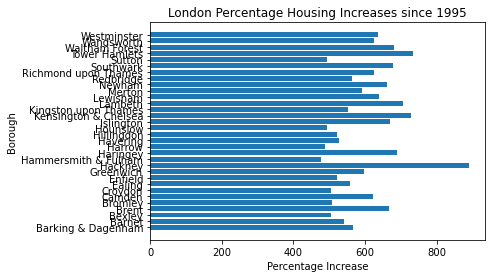

In [7]:
# let's see what is looks like
winner = t_spose['Average Increase']
x_axis = list(t_spose['Average Increase'].index)
fig, ax = plt.subplots()

ax.barh(x_axis, winner, align="center")
ax.set_xlabel("Percentage Increase")
ax.set_ylabel("Borough")
ax.set_title("London Percentage Housing Increases since 1995")
fig.show()

In [8]:
print(f"{t_spose['Average Increase'].idxmax()} had the highest increase "
      f"since 1995 at {t_spose['Average Increase'].max()}%")

Hackney had the highest increase since 1995 at 890%
